In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df = pd.read_csv('data/merged_climate_iom_data.csv')

In [3]:
df.dropna(subset=['year', 'month'], inplace=True)

In [4]:
df['total_idp_over_pop'] = (df['internally_displaced_persons'] / df['sp.pop.totl'])*100
df['total_affected_over_pop'] = (df['total_affected'] / df['sp.pop.totl'])*100

In [5]:
weird_values = df[df['total_idp_over_pop'] > 100]

In [6]:
len(weird_values)

8

In [7]:
weird_values[['year','country_name', 'sp.pop.totl','internally_displaced_persons',  'total_idp_over_pop', 'total_affected_over_pop']]

,year,country_name,sp.pop.totl,internally_displaced_persons,total_idp_over_pop,total_affected_over_pop
872,2021,South Sudan,10865780.0,12058016,110.972392,7.684676
873,2021,South Sudan,10865780.0,12058016,110.972392,71.082518
887,2021,South Sudan,10865780.0,11148285,102.599951,71.082518
1024,2023,Sudan,50042791.0,63571047,127.033376,NaN
1032,2023,Sudan,50042791.0,63441327,126.774158,NaN
1040,2023,Sudan,50042791.0,55837788,111.580084,NaN
1046,2023,Sudan,50042791.0,76711659,153.292128,NaN
1057,2023,Sudan,50042791.0,95451576,190.739913,NaN


In [8]:
df = df[df['total_idp_over_pop'] < 100]

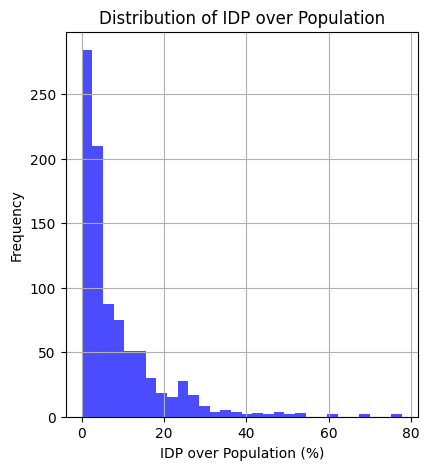

In [9]:
# plot distribution of those two variables

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['total_idp_over_pop'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of IDP over Population')
plt.xlabel('IDP over Population (%)')
plt.ylabel('Frequency')

plt.grid()



In [10]:
pd.options.display.float_format = '{:.2f}'.format
df[['total_idp_over_pop', 'internally_displaced_persons']].describe()


,total_idp_over_pop,internally_displaced_persons
count,909.00,909.00
mean,8.61,2918213.12
std,10.65,3994012.43
min,0.00,166.00
25%,1.69,318591.00
50%,4.70,1002159.00
75%,11.59,4454218.00
max,77.73,38898405.00


In [11]:
grouped_df = df.groupby(['country_code', 'year'])[['total_idp_over_pop', 'total_affected_over_pop']].mean().reset_index()

In [12]:
grouped_df

,country_code,year,total_idp_over_pop,total_affected_over_pop
0,AFG,2017,8.18,NaN
1,AFG,2018,19.81,36.74
2,AFG,2019,33.64,35.66
3,AFG,2020,37.23,NaN
4,AFG,2021,39.41,27.50
...,...,...,...,...
175,ZAF,2022,0.10,0.00
176,ZWE,2018,0.05,15.33
177,ZWE,2019,0.99,45.18
178,ZWE,2020,0.53,NaN


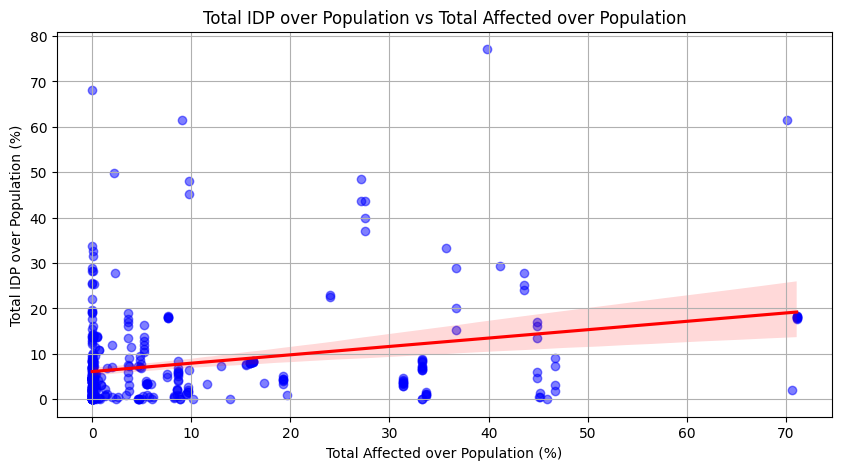

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Scatter plot with regression line
sns.regplot(
    data=df, 
    x="total_affected_over_pop", 
    y="total_idp_over_pop", 
    scatter_kws={"alpha": 0.5, "color": "blue"}, 
    line_kws={"color": "red"}
)

plt.title("Total IDP over Population vs Total Affected over Population")
plt.ylabel("Total IDP over Population (%)")
plt.xlabel("Total Affected over Population (%)")
plt.grid()
plt.show()



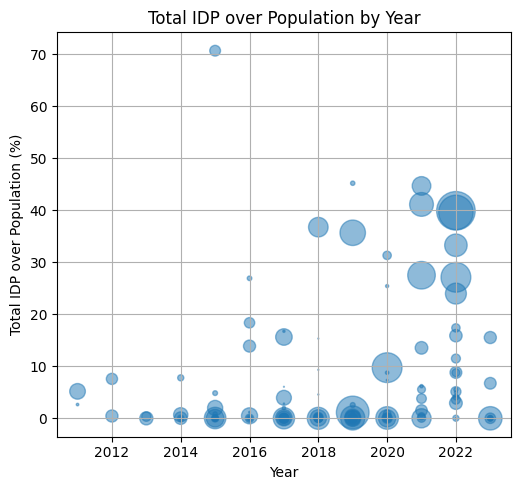

In [14]:
# plot year on x axis, total affected on y axis and give size by total idp over pop
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.scatter(grouped_df['year'], grouped_df['total_affected_over_pop'], s=grouped_df['total_idp_over_pop']*10, alpha=0.5)
plt.title('Total IDP over Population by Year')
plt.xlabel('Year')
plt.ylabel('Total IDP over Population (%)')
plt.grid()
plt.tight_layout()
plt.show()


In [15]:
df

,year,month,country_name,country_code,internally_displaced_persons,temperature_2m,total_precipitation_sum,potential_evaporation_sum,start_year,start_month,...,en.ghg.n2o.tr.mt.ce.ar5,en.ghg.n2o.wa.mt.ce.ar5,er.fsh.aqua.mt,er.fsh.capt.mt,er.fsh.prod.mt,er.h2o.fwtl.k3,er.h2o.intr.k3,sp.pop.totl,total_idp_over_pop,total_affected_over_pop
0,2011,1,Haiti,HTI,1612754,297.77,0.00,-0.37,2019.06,10.00,...,1.03,5.20,2000.00,71008.00,73008.00,20.15,2.94,9914904.00,16.27,5.18
1,2011,2,Sudan,SDN,98298,297.50,0.15,-0.25,2010.00,NaN,...,141.00,792.00,600.00,16530.00,17130.00,1.45,13.01,36140806.00,0.27,NaN
2,2011,3,Haiti,HTI,1360988,298.80,0.18,-0.25,2010.00,10.00,...,141.00,792.00,600.00,16530.00,17130.00,1.45,13.01,9914904.00,13.73,5.18
3,2011,3,Sudan,SDN,268848,298.62,0.14,-0.22,2010.00,NaN,...,141.00,792.00,600.00,16530.00,17130.00,1.45,13.01,36140806.00,0.74,NaN
4,2011,5,Haiti,HTI,1269614,302.28,0.03,-0.25,2019.06,10.00,...,1.03,5.20,2000.00,71008.00,73008.00,20.15,2.94,9914904.00,12.81,5.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,2023,12,Lebanon,LBN,809388,295.74,0.00,-0.26,2018.90,NaN,...,152.00,8.05,1184.08,38246.36,39430.44,538.10,21.82,5773493.00,14.02,NaN
1055,2023,12,Mozambique,MOZ,2128587,296.77,0.10,-0.22,2018.48,10.00,...,492.00,3.93,5592.39,190500.28,202545.67,187.64,112.45,33635160.00,6.33,9.81
1056,2023,12,Nigeria,NGA,2184392,274.39,0.07,-0.03,2018.68,NaN,...,2.50,6.18,21225.24,49625.24,70850.48,182.45,48.45,227882945.00,0.96,NaN
1058,2023,12,Uganda,UGA,5577,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48656601.00,0.01,NaN


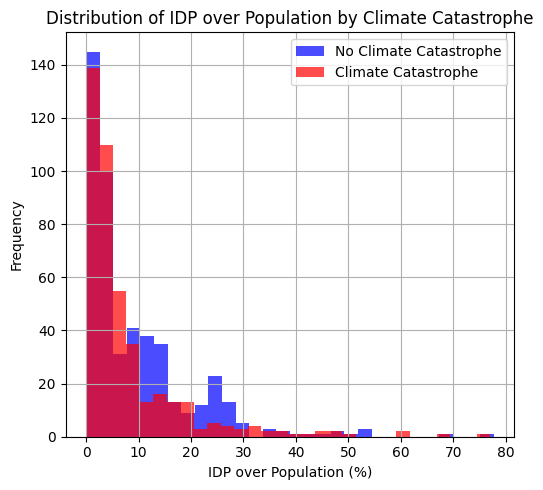

In [16]:
# Plot density plot that shows number of displaced people for when there is a climate catastrophe 0 and 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['climate_catastrophe'] == 0]['total_idp_over_pop'].dropna(), bins=30, color='blue', alpha=0.7, label='No Climate Catastrophe')
plt.hist(df[df['climate_catastrophe'] == 1]['total_idp_over_pop'].dropna(), bins=30, color='red', alpha=0.7, label='Climate Catastrophe')
plt.title('Distribution of IDP over Population by Climate Catastrophe')
plt.xlabel('IDP over Population (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [17]:
df.columns

Index(['year', 'month', 'country_name', 'country_code',
       'internally_displaced_persons', 'temperature_2m',
       'total_precipitation_sum', 'potential_evaporation_sum', 'start_year',
       'start_month', 'end_year', 'end_month', 'disaster_type',
       'total_affected', 'climate_catastrophe', 'cpi_value', 'country_code.1',
       'ag.lnd.frst.k2', 'ag.lnd.prcp.mm', 'ag.lnd.totl.k2', 'ag.srf.totl.k2',
       'eg.cft.accs.ru.zs', 'eg.cft.accs.ur.zs', 'eg.cft.accs.zs',
       'eg.egy.prim.pp.kd', 'eg.elc.accs.zs', 'eg.fec.rnew.zs',
       'en.ghg.all.mt.ce.ar5', 'en.ghg.ch4.ag.mt.ce.ar5',
       'en.ghg.ch4.bu.mt.ce.ar5', 'en.ghg.ch4.fe.mt.ce.ar5',
       'en.ghg.ch4.ic.mt.ce.ar5', 'en.ghg.ch4.mt.ce.ar5',
       'en.ghg.ch4.pi.mt.ce.ar5', 'en.ghg.ch4.tr.mt.ce.ar5',
       'en.ghg.ch4.wa.mt.ce.ar5', 'en.ghg.co2.bu.mt.ce.ar5',
       'en.ghg.co2.ic.mt.ce.ar5', 'en.ghg.co2.ip.mt.ce.ar5',
       'en.ghg.co2.lu.mt.ce.ar5', 'en.ghg.co2.mt.ce.ar5',
       'en.ghg.co2.pi.mt.ce.ar5', 'en.g

In [18]:
env_factors = [
'ag.lnd.frst.k2', 'ag.lnd.prcp.mm',
       'ag.lnd.totl.k2', 'ag.srf.totl.k2', 'eg.cft.accs.ru.zs',
       'eg.cft.accs.ur.zs', 'eg.cft.accs.zs', 'eg.egy.prim.pp.kd',
       'eg.elc.accs.zs', 'eg.fec.rnew.zs', 'en.ghg.all.mt.ce.ar5',
       'en.ghg.ch4.ag.mt.ce.ar5', 'en.ghg.ch4.bu.mt.ce.ar5',
       'en.ghg.ch4.fe.mt.ce.ar5', 'en.ghg.ch4.ic.mt.ce.ar5',
       'en.ghg.ch4.mt.ce.ar5', 'en.ghg.ch4.pi.mt.ce.ar5',
       'en.ghg.ch4.tr.mt.ce.ar5', 'en.ghg.ch4.wa.mt.ce.ar5',
       'en.ghg.co2.bu.mt.ce.ar5', 'en.ghg.co2.ic.mt.ce.ar5',
       'en.ghg.co2.ip.mt.ce.ar5', 'en.ghg.co2.lu.mt.ce.ar5',
       'en.ghg.co2.mt.ce.ar5', 'en.ghg.co2.pi.mt.ce.ar5',
       'en.ghg.co2.tr.mt.ce.ar5', 'en.ghg.fgas.ip.mt.ce.ar5',
       'en.ghg.n2o.ag.mt.ce.ar5', 'en.ghg.n2o.bu.mt.ce.ar5',
       'en.ghg.n2o.fe.mt.ce.ar5', 'en.ghg.n2o.ic.mt.ce.ar5',
       'en.ghg.n2o.ip.mt.ce.ar5', 'en.ghg.n2o.mt.ce.ar5',
       'en.ghg.n2o.pi.mt.ce.ar5', 'en.ghg.n2o.tr.mt.ce.ar5',
       'en.ghg.n2o.wa.mt.ce.ar5', 'er.fsh.aqua.mt', 'er.fsh.capt.mt',
       'er.fsh.prod.mt', 'er.h2o.fwtl.k3', 'er.h2o.intr.k3', 'sp.pop.totl', 'total_affected']

#impute mean to nas in env_factors

for col in env_factors:
       if col == 'total_affected':
              df[col].fillna(0, inplace=True)
       else:
              df[col].fillna(df[col].mean(), inplace=True)


import statsmodels.api as sm

# Drop rows with missing values in the selected columns
df_clean = df[["internally_displaced_persons"] + env_factors].dropna()

# Define independent (X) and dependent (y) variables
X = df_clean[env_factors]  # Environmental factors
y = df_clean["internally_displaced_persons"]  # Displacement

# Add a constant term for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display model summary
model.summary()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9848\2512075865.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9848\2512075865.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     internally_displaced_persons   R-squared:                       0.198
Model:                                      OLS   Adj. R-squared:                  0.158
Method:                           Least Squares   F-statistic:                     4.954
Date:                          Mon, 07 Apr 2025   Prob (F-statistic):           3.27e-21
Time:                                  14:03:21   Log-Likelihood:                -15006.
No. Observations:                           909   AIC:                         3.010e+04
Df Residuals:                               865   BIC:                         3.031e+04
Df Model:                                    43                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.798e+06   1.73e+06      3.360      0.001    2.41e+06    9.18e+06
ag.lnd.frst.k2              14.1071      4.581      3.079      0.002       5.115      23.099
ag.lnd.prcp.mm           -1120.7380    750.750     -1.493      0.136   -2594.243     352.767
ag.lnd.totl.k2              -2.7040      3.506     -0.771      0.441      -9.585       4.177
ag.srf.totl.k2              -0.5455      3.269     -0.167      0.868      -6.961       5.870
eg.cft.accs.ru.zs         -2.87e+04   5.61e+04     -0.511      0.609   -1.39e+05    8.15e+04
eg.cft.accs.ur.zs         -2.03e+04   2.87e+04     -0.706      0.480   -7.67e+04    3.61e+04
eg.cft.accs.zs            4.607e+04   7.97e+04      0.578      0.564    -1.1e+05    2.03e+05
eg.egy.prim.pp.kd        -2.393e+05   1.24e+05     -1.930      0.054   -4.83e+05    4004.373
eg.elc.accs.zs            1103.5763   1.52e+04      0.073      0.942   -2.87e+04    3.09e+04
eg.fec.rnew.zs            -1.09e+04   1.28e+04     -0.855      0.393   -3.59e+04    1.41e+04
en.ghg.all.mt.ce.ar5      2513.5122   1330.143      1.890      0.059     -97.172    5124.197
en.ghg.ch4.ag.mt.ce.ar5   3822.4558   1661.272      2.301      0.022     561.859    7083.052
en.ghg.ch4.bu.mt.ce.ar5   -717.3275    985.891     -0.728      0.467   -2652.346    1217.691
en.ghg.ch4.fe.mt.ce.ar5   1513.7163   1242.883      1.218      0.224    -925.703    3953.136
en.ghg.ch4.ic.mt.ce.ar5   1356.1505   3164.706      0.429      0.668   -4855.251    7567.552
en.ghg.ch4.mt.ce.ar5      -392.1306   1825.649     -0.215      0.830   -3975.350    3191.089
en.ghg.ch4.pi.mt.ce.ar5     34.2807   1905.237      0.018      0.986   -3705.148    3773.709
en.ghg.ch4.tr.mt.ce.ar5   -965.0166   1014.709     -0.951      0.342   -2956.596    1026.562
en.ghg.ch4.wa.mt.ce.ar5     -7.3447   1293.721     -0.006      0.995   -2546.545    2531.855
en.ghg.co2.bu.mt.ce.ar5    874.3679   1271.529      0.688      0.492   -1621.275    3370.011
en.ghg.co2.ic.mt.ce.ar5   -241.8935    980.755     -0.247      0.805   -2166.830    1683.043
en.ghg.co2.ip.mt.ce.ar5  -1482.2967    991.737     -1.495      0.135   -3428.790     464.196
en.ghg.co2.lu.mt.ce.ar5    113.0083   1037.938      0.109      0.913   -1924.163    2150.180
en.ghg.co2.mt.ce.ar5       171.0367   1887.544      0.091      0.928   -3533.666    3875.739
en.ghg.co2.pi.mt.ce.ar5  -1389.8664    977.683     -1.422      0.156   -3308.775     529.042
en.ghg.co2.tr.mt.ce.ar5   -726.3009   1808.522     -0.402      0.688   -4275.906    2823.304
en.ghg.fgas.ip.mt.ce.ar5 -3005.6155   1268.132     -2.370      0.018   -5494.592    -516.639
en.ghg.n2o.ag.mt.ce.ar5   1238.5105   3544.410      0.349      0.727   -5718.138    8195.1

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model on the training set
model_train = sm.OLS(y_train, X_train).fit()

# Predict on the test set
y_pred = model_train.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(2121527.776077526, 0.19745488837687852)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=["internally_displaced_persons"]), drop_first=True)

# Fill missing values with the median
df_encoded = df_encoded.fillna(df_encoded.median(numeric_only=True))
y_filled = df["internally_displaced_persons"].fillna(df["internally_displaced_persons"].median())

# Split into train and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_encoded, y_filled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

mae_rf, r2_rf


(130020.15571428572, 0.9884138206303724)

In [22]:
from sklearn.linear_model import Ridge, Lasso

# Initialize Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
lasso_model = Lasso(alpha=0.1)  # Alpha for Lasso

# Train Ridge Regression
ridge_model.fit(X_train_rf, y_train_rf)
y_pred_ridge = ridge_model.predict(X_test_rf)
mae_ridge = mean_absolute_error(y_test_rf, y_pred_ridge)
r2_ridge = r2_score(y_test_rf, y_pred_ridge)

# Train Lasso Regression
lasso_model.fit(X_train_rf, y_train_rf)
y_pred_lasso = lasso_model.predict(X_test_rf)
mae_lasso = mean_absolute_error(y_test_rf, y_pred_lasso)
r2_lasso = r2_score(y_test_rf, y_pred_lasso)

# Output results
(mae_ridge, r2_ridge), (mae_lasso, r2_lasso)


c:\Users\LENOVO\anaconda3\envs\hertie_climate_migration\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.2892e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\LENOVO\anaconda3\envs\hertie_climate_migration\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.019e+14, tolerance: 1.281e+12
  model = cd_fast.enet_coordinate_descent(


((835725.7248905393, 0.8275591349218452),
 (866710.023265686, 0.8132352937863255))